<h1>This aim of this lab is to study the evolution Apple stock prices of NASDAQ at opening
time.</h1>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

Importation of the data.

In [12]:
data_train = pd.read_csv('training_data.csv')
data_test = pd.read_csv('test_data.csv')

We would like to forecast opening stock price which means column 2 “Open”.

In [13]:
data_train = data_train.iloc[:,1:2].values
data_test = data_test.iloc[:,1:2].values

Plot the training set and see what it looks like

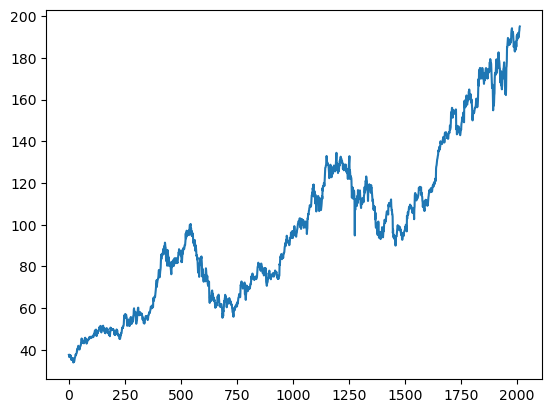

In [14]:
plt.plot(data_train)
plt.show()

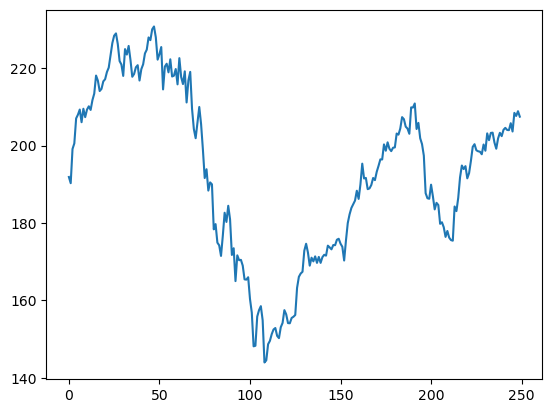

In [15]:
plt.plot(data_test)
plt.show()

To prevent the learning process to be slow due to data magnitude, normalize the data with features’ scaling with MinMaxScaler.

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_train_scaled = scaler.fit_transform(data_train)
data_test_scaled = scaler.fit_transform(data_test)

In [17]:
m_train, n_train = data_train.shape
m_test, n_test = data_test.shape
t_step = 60
y_train = list()
x_train = list()

In [18]:
m_train,n_train

(2015, 1)

In [19]:
m_test,n_test

(250, 1)

In [ ]:
for i in range(t_step,m_train):
    # Create temporary samples
    sample_x_train = data_train_scaled[i-t_step:i]
    sample_y_train = data_train_scaled[i]

    # Let’s add a padding
    if sample_x_train.shape[0] < t_step:
        print(True)
        var = np.zeros((t_step - sample_x_train.shape[0]),1)
        sample_x_train = np.concatenate((sample_x_train, var), axis = 0)
        sample_y_train = np.concatenate((sample_y_train, var), axis = 0)

    # Adding to the lists x train, y train
    x_train.append(sample_x_train)
    y_train.append(sample_y_train)

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)